<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica 5 - Introducción al análisis frecuencial de señales</center></font></h2>
<h3><font color='0B5345'> <center>
Diego Andrés Flórez - Daniel Felipe Soto </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

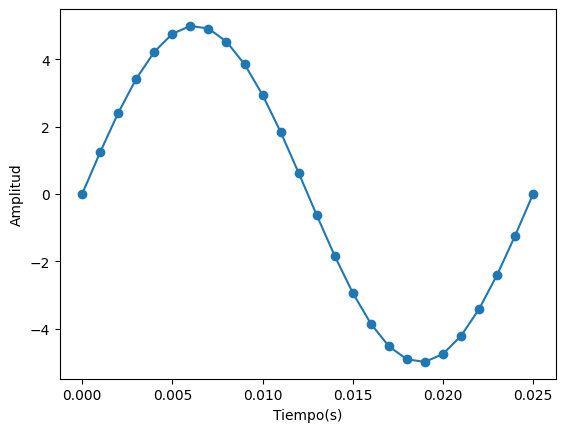

In [ ]:
from scipy.fftpack import fft;
import matplotlib.pyplot as plt
import numpy as np
Fo=40#Frecuenciafundamentaldelaseñal
Tp=1/Fo#Periododelaseñal
Fs=1000 #Frecuenciademuestreo
T=1/Fs#Periododemuestreo
t=np.arange(0,Tp+T,T)#Tiempo para un ciclo de laseñal con duración de Tp más una muestraT
A=5
x=A*np.sin(2*np.pi*Fo*t)
plt.plot(t,x,marker='o')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.show()

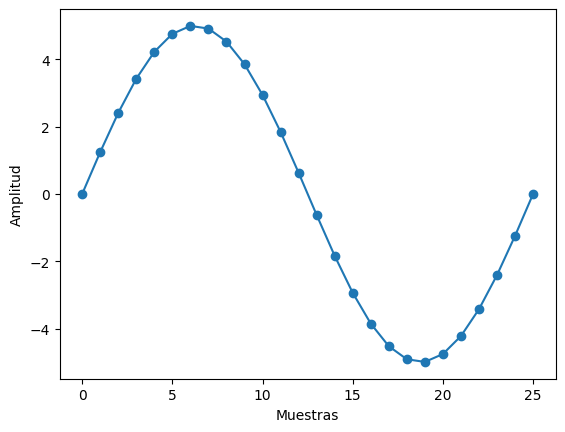

In [ ]:
fo=Fo/Fs
n=np.arange(0,len(t))
x1=A*np.sin(2*np.pi*fo*n)
plt.plot(n,x1,marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

# a) Compruebe que los valores de las primeras cinco muestras son los mismos.

In [ ]:
# Comparar los valores de las primeras cinco muestras
primeras_cinco_muestras_x = x[:5]  # Primeras cinco muestras de la señal muestreada
primeras_cinco_muestras_x1 = x1[:5]  # Primeras cinco muestras de la señal discreta

print("Primeras cinco muestras de la señal muestreada (x):", primeras_cinco_muestras_x)
print("Primeras cinco muestras de la señal discreta (x1):", primeras_cinco_muestras_x1)


Primeras cinco muestras de la señal muestreada (x): [0.         1.24344944 2.40876837 3.42273553 4.22163963]
Primeras cinco muestras de la señal discreta (x1): [0.         1.24344944 2.40876837 3.42273553 4.22163963]


# b) La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

La potencia media de la señal  x(𝑛)  y la señal  x10(𝑛)  son iguales porque la potencia de una señal periódica en el dominio del tiempo es constante si la señal es periódica y tiene la misma forma de onda a lo largo del tiempo.
En este caso, x(𝑛) representa un ciclo de la señal periódica y x10(𝑛) representa 10 ciclos de la misma señal. Dado que la señal es periódica y se repite exactamente igual en cada ciclo, la energía y la potencia de cada ciclo serán las mismas.

# 4.1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

Frecuencia de muestreo mínima necesaria: 640 Hz


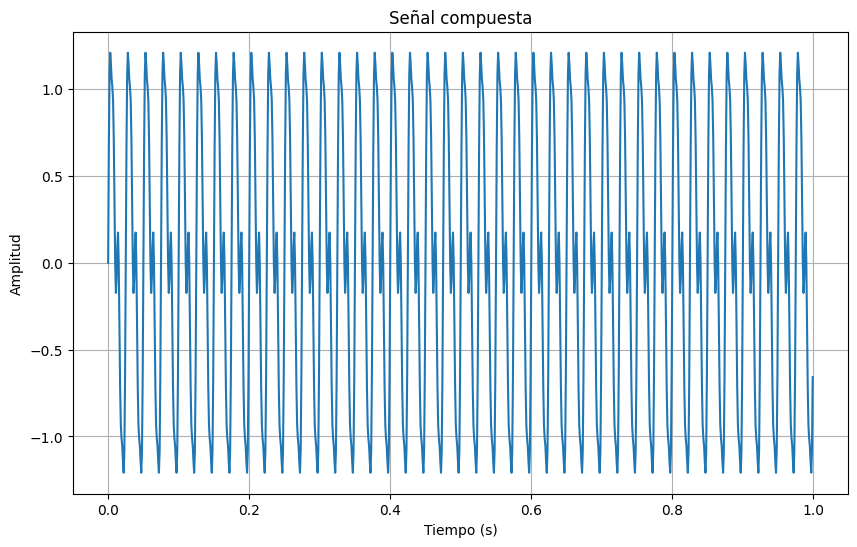

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
frecuencias = [40, 80, 160]  # Frecuencias de las componentes (Hz)
amplitudes = [1, 0.5, 0.2]  # Amplitudes de las componentes
duracion = 1  # Duración de la señal (s)

# Frecuencia de muestreo mínima necesaria (según el criterio de Nyquist)
frecuencia_nyquist = 2 * max(frecuencias)
frecuencia_muestreo_minima = 2 * frecuencia_nyquist
print("Frecuencia de muestreo mínima necesaria:", frecuencia_muestreo_minima, "Hz")

# Utilizaremos una frecuencia de muestreo mayor para representar adecuadamente la señal
frecuencia_muestreo = 1000  # Hz

# Vector de tiempo
t = np.linspace(0, duracion, int(duracion * frecuencia_muestreo), endpoint=False)

# Generar las componentes sinusoidales
componentes = [amp * np.sin(2 * np.pi * freq * t) for freq, amp in zip(frecuencias, amplitudes)]

# Sumar las componentes para obtener la señal compuesta
senal = np.sum(componentes, axis=0)

# Graficar la señal compuesta
plt.figure(figsize=(10, 6))
plt.plot(t, senal)
plt.title('Señal compuesta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


# 4.2. Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). (10%)

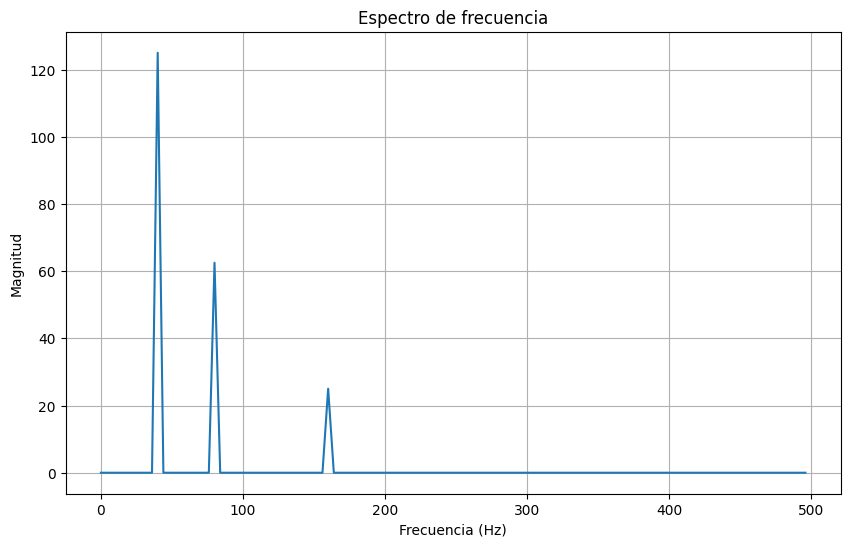

In [ ]:
#Parámetros de la señal
frecuencias = [40, 80, 160]  # Frecuencias de las componentes (Hz)
amplitudes = [1, 0.5, 0.2]  # Amplitudes de las componentes
duracion_periodo = 1 / min(frecuencias)  # Duración de un periodo de la señal
duracion_total = 10 * duracion_periodo  # Duración total de la señal (10 periodos)

# Frecuencia de muestreo
frecuencia_muestreo = 1000  # Hz
numero_muestras = int(duracion_total * frecuencia_muestreo)

# Vector de tiempo
t = np.linspace(0, duracion_total, numero_muestras, endpoint=False)

# Generar las componentes sinusoidales
componentes = [amp * np.sin(2 * np.pi * freq * t) for freq, amp in zip(frecuencias, amplitudes)]

# Sumar las componentes para obtener la señal compuesta
senal = np.sum(componentes, axis=0)

# Calcular la Transformada de Fourier
fft_resultado = np.fft.fft(senal)

# Calcular las frecuencias correspondientes
frecuencias_fft = np.fft.fftfreq(numero_muestras, d=1/frecuencia_muestreo)

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_fft[:numero_muestras//2], np.abs(fft_resultado[:numero_muestras//2]))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


Las frecuencias de interés son 40, 80 y 160 Hz. Se cumplió con lo que se esperaba que era ver picos en el espectro de frecuencia en torno a estas frecuencias

# 4.3. Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. (10%)


La función que permite realizar el cálculo de la transformada inversa de Fourier en NumPy es **np.fft.ifft()**. Esta función toma como argumento la salida de la transformada de Fourier  y devuelve la señal en el dominio del tiempo[1].

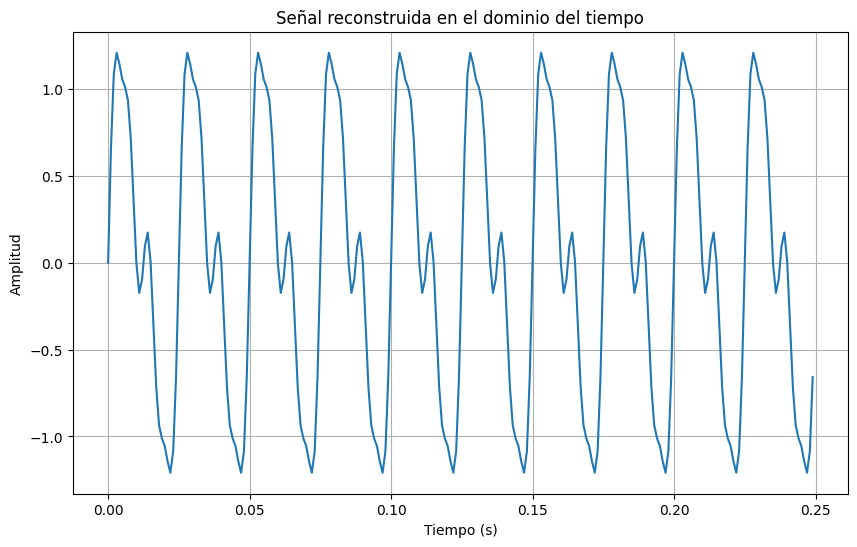

In [ ]:
# Calcular la Transformada inversa de Fourier
senal_reconstruida = np.fft.ifft(fft_resultado)

# Graficar la señal reconstruida en el dominio del tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, senal_reconstruida.real)  # Se utiliza .real para obtener la parte real de la señal
plt.title('Señal reconstruida en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


# 4.4. ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%)

F1 = np.fft.fft(x);

F2 = np.zeros((len(F1)));

F2[9:13] = F1[9:13];

xr = np.fft.ifft(F2);

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(t, np.real(xr))

ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');


plt.show()

Extraiga de manera similar cada una de las componentes de la señal.


Si corresponde a un filtro pues primero se calcula la transformada de Fourier, luego se especifica un rango con F1[9:13] a F2[9:13]. Esto elimina todas las frecuencias que no se encuentren dentro de ese rango, lo que equivale a aplicar un filtro pasa bandas.

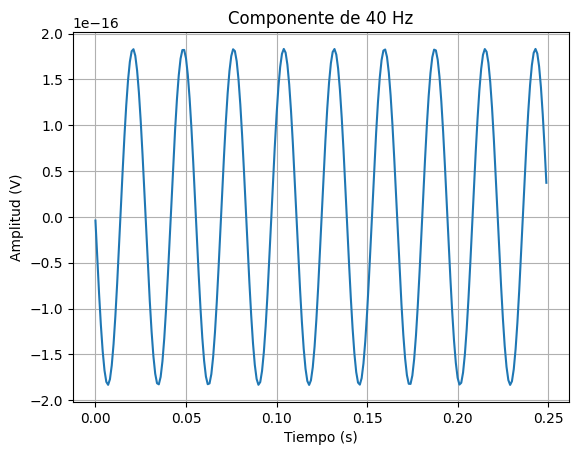

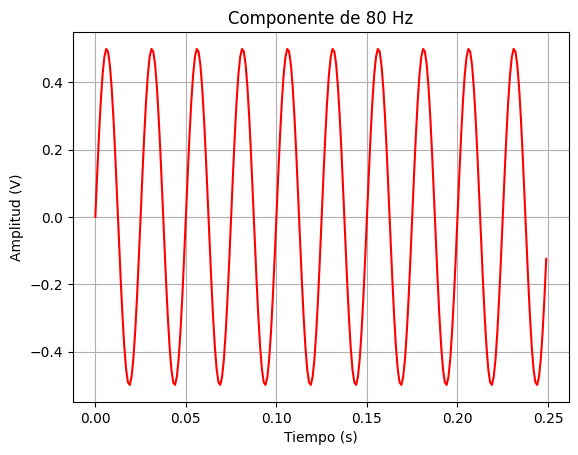

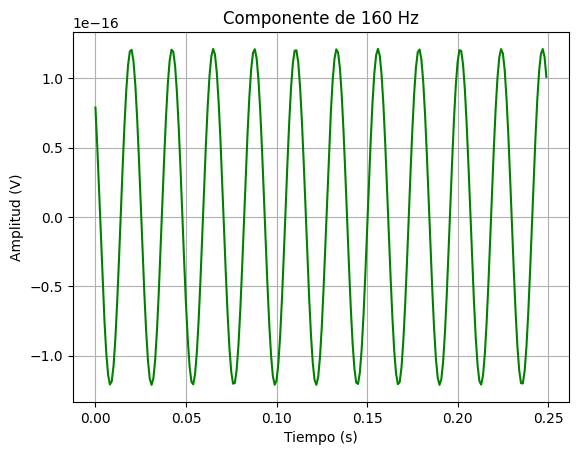

In [ ]:
# Calcular la Transformada de Fourier
F1 = np.fft.fft(senal)

# Componente de 40 Hz
Filtro_40Hz = np.zeros_like(F1)  # Creamos un filtro para la frecuencia de 40 Hz
Filtro_40Hz[9] = F1[9]  # Seleccionamos la frecuencia de 40 Hz
xr_40Hz = np.fft.ifft(Filtro_40Hz)  # Aplicamos la transformada inversa de Fourier
plt.figure()
plt.plot(t, np.real(xr_40Hz))
plt.title('Componente de 40 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.show()

# Componente de 80 Hz
Filtro_80Hz = np.zeros_like(F1)  # Creamos un filtro para la frecuencia de 80 Hz
Filtro_80Hz[10] = F1[10]  # Seleccionamos la frecuencia de 80 Hz
xr_80Hz = np.fft.ifft(Filtro_80Hz)  # Aplicamos la transformada inversa de Fourier
plt.figure()
plt.plot(t, np.real(xr_80Hz), color='red')
plt.title('Componente de 80 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.show()

# Componente de 160 Hz
Filtro_160Hz = np.zeros_like(F1)  # Creamos un filtro para la frecuencia de 160 Hz
Filtro_160Hz[11] = F1[11]  # Seleccionamos la frecuencia de 160 Hz
xr_160Hz = np.fft.ifft(Filtro_160Hz)  # Aplicamos la transformada inversa de Fourier
plt.figure()
plt.plot(t, np.real(xr_160Hz), color='green')
plt.title('Componente de 160 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.show()


## 4.5. El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


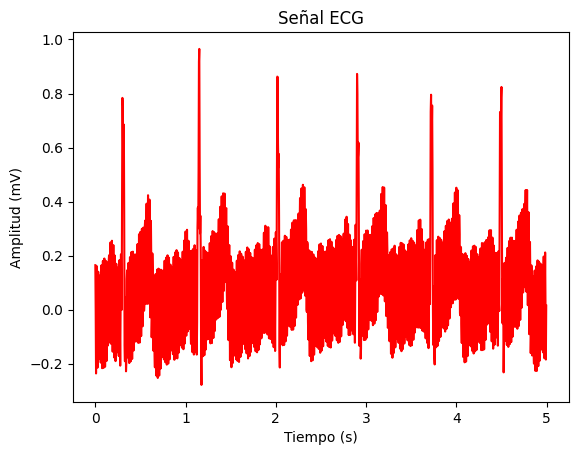

In [ ]:
from google.colab import drive
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Montar Google Drive
drive.mount('/content/drive')
# Ruta de la señal
ruta_senal = "/content/drive/MyDrive/Practica 5/senecg.mat"
# Cargar la señal .mat
datos = sio.loadmat(ruta_senal)
ECG=np.squeeze(datos['ECG'])
fs=250 # Frecuencia de muestreo en Hz
time=np.arange(0,len(ECG)/fs,1/fs)
plt.plot(time,ECG,color='red')
plt.title('Señal ECG')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.show()


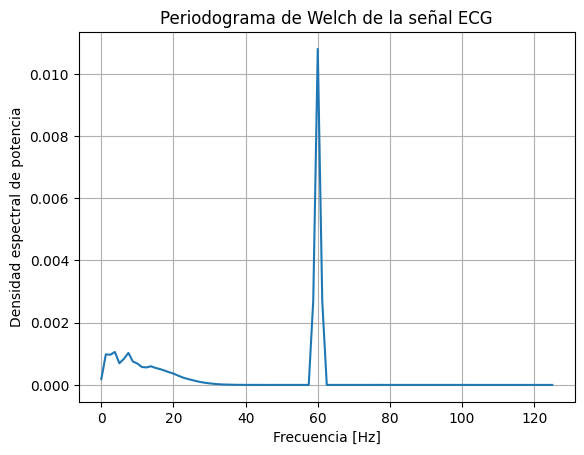

In [ ]:
from scipy.signal import welch

f,Pxx=welch(ECG,fs=fs,window='hann',nperseg=200,noverlap=100)

plt.plot(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal ECG')
plt.grid()
plt.show()

Es necesaria la aplicación de un filtro antes de realizar cualquier análisis adicional de la señal pues al visualizar el periodograma se observa un pico en la frecuencia alrededor de los 60 Hz, lo que indica la presencia de ruido en la señal.

<Figure size 640x480 with 0 Axes>

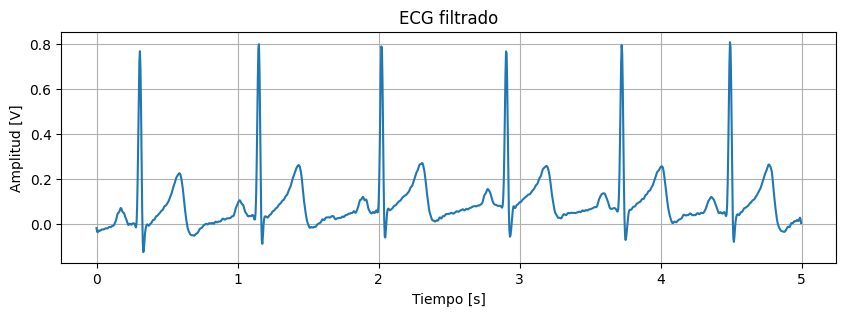

In [ ]:
ECGf=np.fft.fft(ECG)

plt.figure()
ECGf[250:1000]=0
xreg = np.fft.ifft(ECGf)
plt.figure(figsize=(10,3))
plt.plot(time, np.real(xreg))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.title('ECG filtrado')
plt.grid()
plt.show()

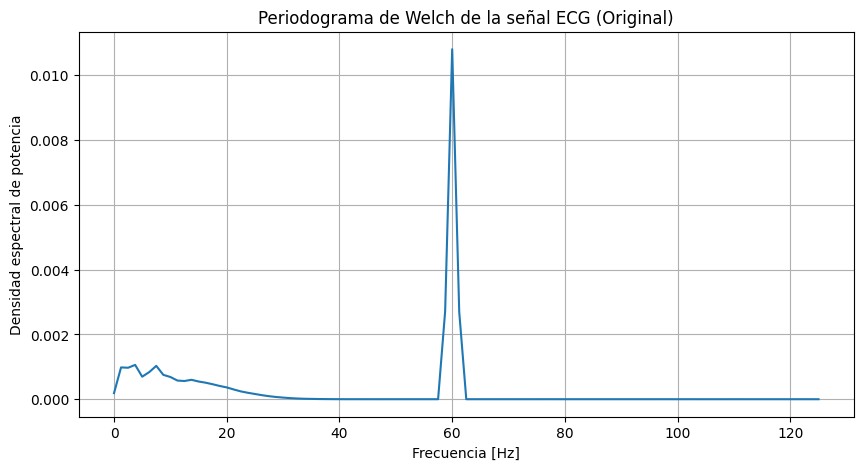

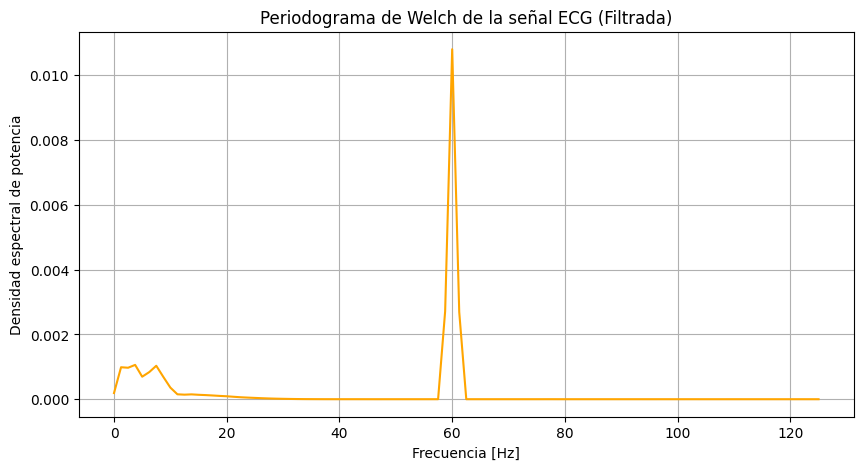

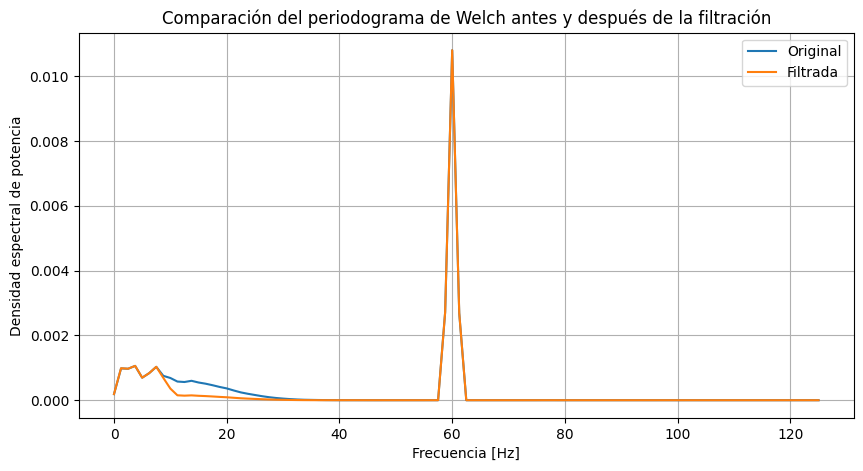

In [ ]:
# Determinar si es necesario eliminar ruido (observando el periodograma)
# Calcular el periodograma de Welch de la señal original
f_orig, Pxx_orig = welch(ECG, fs=fs, window='hann', nperseg=200, noverlap=100)

# Graficar el periodograma de Welch de la señal original
plt.figure(figsize=(10, 5))
plt.plot(f_orig, Pxx_orig)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal ECG (Original)')
plt.grid()
plt.show()

# Analizar el periodograma para determinar si es necesario eliminar ruido
# Por ejemplo, buscar picos significativos en el espectro que puedan indicar ruido

# Supongamos que decides que es necesario eliminar ruido

# Aplicar transformada de Fourier a la señal de ECG
ECGf = np.fft.fft(ECG)

# Aplicar filtro eliminando componentes de frecuencia entre 50 Hz y 200 Hz
ECGf[50:200] = 0

# Obtener la señal filtrada en el dominio del tiempo
xreg = np.fft.ifft(ECGf)

# Calcular el periodograma de Welch de la señal filtrada
f_filt, Pxx_filt = welch(np.real(xreg), fs=fs, window='hann', nperseg=200, noverlap=100)

# Graficar el periodograma de Welch de la señal filtrada
plt.figure(figsize=(10, 5))
plt.plot(f_filt, Pxx_filt,color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal ECG (Filtrada)')
plt.grid()
plt.show()

# Comparar el periodograma de Welch antes y después de la filtración
# Puedes visualizar ambos periodogramas en la misma gráfica para comparar
plt.figure(figsize=(10, 5))
plt.plot(f_orig, Pxx_orig, label='Original')
plt.plot(f_filt, Pxx_filt, label='Filtrada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación del periodograma de Welch antes y después de la filtración')
plt.legend()
plt.grid()
plt.show()


El ancho de la ventana se elige en función de la resolución deseada en el análisis en frecuencia. Una ventana más grande aumenta la resolución en frecuencia pero disminuye la resolución en el tiempo, mientras que una ventana más pequeña tiene el efecto contrario. En el análisis de la señal de electrocardiograma (ECG), se empleó el método de periodograma de Welch para caracterizar su contenido en frecuencia. Para este propósito, se utilizó una ventana de Hanning con un ancho de ventana de 200 muestras ya que según la bibliografía consultada esto consiste aproximadamente en un ciclo de actividad cardiaca [3]. Además, la eleccion de ancho de ventana de 200 se basa en la necesidad de capturar variaciones sutiles en el espectro de la señal sin comprometer significativamente la resolución temporal. Se empleó un solapamiento del 50% entre segmentos de la señal, que garantiza una estimación más suave del espectro, mejorando así la resolución en frecuencia y proporcionando una representación precisa del contenido espectral de la señal. La ventana de Hanning fue seleccionada debido a su capacidad para suprimir los lóbulos laterales y proporcionar bordes suaves, lo que contribuye a reducir las fugas espectrales y mejorar la precisión de la estimación del espectro de potencia en el análisis de la señal de ECG.

# 4.6. Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana) (25%)

In [ ]:
!cp /content/drive/MyDrive/EEG/control.zip .
!unzip control.zip

In [ ]:
!cp /content/drive/MyDrive/EEG/parkinson.zip .
!unzip parkinson.zip

In [ ]:

import os;
import glob;
import numpy as np;
import scipy.io as sio;
import pandas as pd;
import matplotlib.pyplot as plt;
from scipy import stats;
from numpy.lib.stride_tricks import sliding_window_view
current_directory = os.getcwd()


In [ ]:

control=glob.glob('/content/drive/MyDrive/Practica 5/C044_EP_reposo.mat')
parkinson=glob.glob('/content/drive/MyDrive/Practica 5/P025_EP_reposo.mat')
fs=1000; #Frecuencia  a  la  cual  fueron digitalizados los datos

# Se usaran los datos del canal 1 del primer sujeto correspondiente a control y con enfermedad de parkinson
sano=sio.loadmat(control[0]);
paciente_sano=sano['data']
parkinson=sio.loadmat(parkinson[0]);
paciente_parkinson=parkinson['data']

s=np.reshape(paciente_sano,(paciente_sano.shape[0], paciente_sano.shape[1]*paciente_sano.shape[2]),order = 'F')
p=np.reshape(paciente_parkinson,(paciente_parkinson.shape[0], paciente_parkinson.shape[1]*paciente_parkinson.shape[2]),order = 'F')

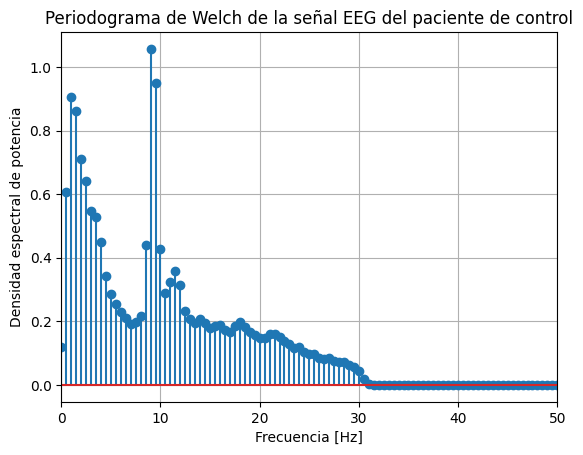

In [ ]:
# Periodograma de Welch de la señal de EEG del paciente sano
nperseg = 2000 # La longitud de la ventana esta relacionada con el len de la señal que equivale a 2000 puntos
noverlap = int(nperseg/2);
f,Pxx_control=welch(s[0,:],fs,'hann',nperseg,noverlap)

plt.stem(f,Pxx_control)
plt.xlim([0, 50])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal EEG del paciente de control')
plt.grid()
plt.show()

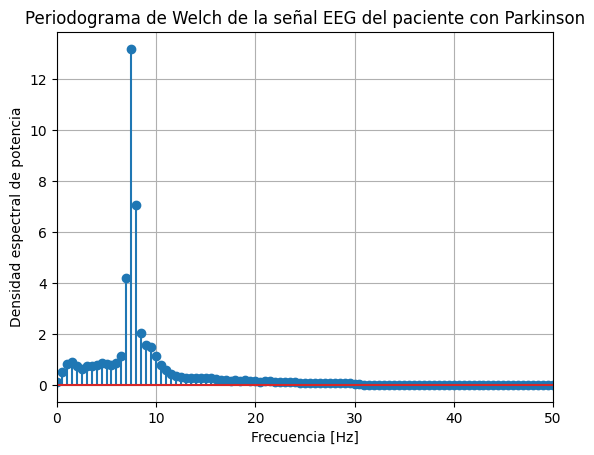

In [ ]:
# Periodograma de Welch de una EEG del paciente con Parkinson
f,Pxx_parkinson=welch(p[0,:],fs,'hann',nperseg,noverlap)

plt.stem(f,Pxx_parkinson)
plt.xlim([0, 50])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal EEG del paciente con Parkinson')
plt.grid()
plt.show()

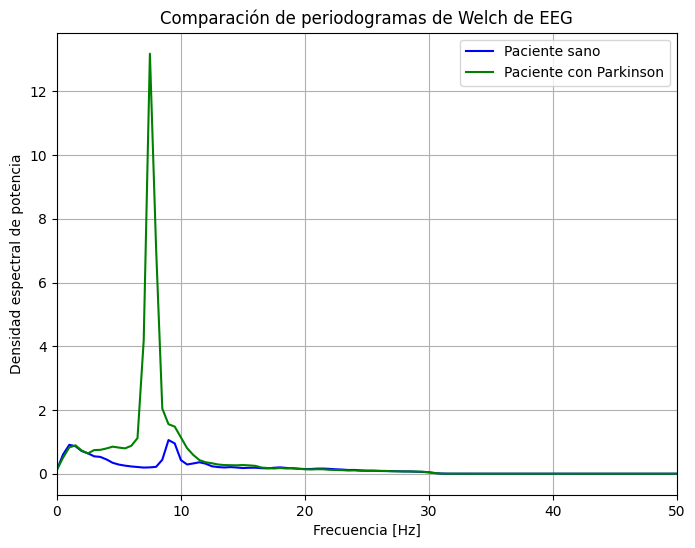

In [ ]:
# Graficar ambos periodogramas en la misma figura
plt.figure(figsize=(8,6))
plt.plot(f, Pxx_control, label='Paciente sano',color='blue')
plt.plot(f, Pxx_parkinson, label='Paciente con Parkinson',color='green')
plt.xlim([0, 50])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación de periodogramas de Welch de EEG')
plt.legend()
plt.grid()
plt.show()


La observación de una gran diferencia en la densidad espectral de potencia (PSD) entre las señales de los sujetos sanos y los sujetos con Parkinson, con picos mucho más altos en la PSD del grupo afectado por Parkinson, sugiere una marcada disparidad en la actividad neuronal en diversas frecuencias entre ambos grupos. Esta discrepancia es fundamental para distinguir entre los sujetos sanos y los sujetos con Parkinson, ya que los picos más elevados en la PSD del grupo con Parkinson pueden reflejar una actividad anómala o desregulada en ciertas frecuencias. Esta irregularidad en la actividad puede atribuirse a las características neurodegenerativas de la enfermedad de Parkinson, que afecta la función cerebral. Por lo tanto, el análisis de la PSD se presenta como una herramienta valiosa para identificar y caracterizar las diferencias entre los sujetos sanos y aquellos afectados por Parkinson, proporcionando información útil para el diagnóstico y la monitorización de la enfermedad.

Por ejemplo, en un sujeto con Parkinson en reposo, la PSD podría ser mayor en comparación con un sujeto sano debido a la presencia de actividad neuronal anómala, como oscilaciones rítmicas características de la enfermedad. Estas oscilaciones pueden manifestarse como picos más altos en la PSD en ciertas frecuencias, como las frecuencias beta o gamma.

Otro ejemplo podriar ser que durante episodios de movimientos involuntarios asociados con el Parkinson, como temblores o discinesias, la PSD podría aumentar significativamente en las frecuencias específicas asociadas con estos movimientos anormales.

**Nota:** Para variar el solapamiento deberiamos definir el parámetro noverlap en el momento en que llamamos la funcion Welch, Por ejemplo si quisieramos un solapamiento de 60% nuestra linea de codigo deberia ser modificada de la siguiente manera :


1) from scipy.signal import welch

2)nperseg = 2000  

3)window = 'hann'

4)noverlap = int(nperseg * 0.6

Donde, En la linea 4 podemos ver la implementacion del nperseg *0.6
# **Justificación:**


Si no se especifica un parametro el solapamiento sera definido del 50% [2].
El uso de un solapamiento del 50% es una opción razonable en muchos casos, incluido el análisis de señales de EEG con el periodograma de Welch.

Las razones para justificar la elección de un solapamiento al 50% se debe principalmente a los siguientes factores:

1. **Balance entre resolución temporal y frecuencial**: El solapamiento del 50% proporciona un buen equilibrio entre la resolución temporal y la resolución frecuencial. Esto significa que obtendremos una buena precisión en la localización de eventos en el tiempo (resolución temporal) y también en la identificación de componentes espectrales en diferentes frecuencias (resolución frecuencial).

2. **Reducción de la varianza**: El solapamiento del 50% ayuda a reducir la varianza de la estimación espectral promediando la información de múltiples segmentos superpuestos. Esto puede mejorar la robustez de tus resultados y hacer que las estimaciones espectrales sean más confiables.

3. **Mitigación del efecto de la ventana**: Cuando se utiliza una ventana para segmentar la señal como en este caso la ventana de hanning, hay una pérdida de energía en los bordes de la ventana. El solapamiento del 50% ayuda a mitigar este efecto al promediar la energía de las ventanas superpuestas.


Por otro lado, el ancho de la ventana utilizado para calcular el periodograma de Welch fue de 2000 muestras. Esto se especifica mediante el parámetro `nperseg` en la función `welch()`

Por lo tanto, cada segmento de la señal se divide en ventanas de 2000 muestras antes de calcular la transformada de Fourier de cada segmento. Esto significa que cada segmento tendrá 2000 muestras de la señal y el análisis espectral se realizará en segmentos de esta longitud.

Es importante tener en cuenta que el ancho de la ventana afecta tanto la resolución en frecuencia como la resolución en tiempo del análisis espectral.
el valor de 2000 para el ancho de la ventana (`nperseg`) es comúnmente utilizado en análisis de señales, incluido el análisis de señales de EEG. Sin embargo, la elección del valor óptimo para `nperseg` depende de varios factores y puede variar.

Las razones del uso de este ancho de banda son principalmente:

1. **Balance entre resolución en frecuencia y resolución en tiempo**: Un valor de 2000 proporciona un buen equilibrio entre la resolución en frecuencia y la resolución en tiempo. Esto significa que podremos distinguir bien las características espectrales de la señal en diferentes frecuencias, al tiempo que logramos mantener una buena resolución en la representación temporal de la señal.

2. **Tamaño suficiente para capturar características relevantes**: 2000 muestras suelen ser suficientes para capturar las características relevantes de la señal de EEG. Esto puede incluir patrones de actividad cerebral específicos, eventos de interés o cambios en la actividad cerebral que son importantes para nuestro analisis.
es importante tener en cuenta que la elección del valor óptimo para `nperseg` puede **depender de la naturaleza específica de los datos y de los objetivos del analisis**.

# Conclusiones

*   El periodograma de Welch utiliza la transformada de Fourier para calcular la densidad espectral de potencia de una señal EEG, lo que permite analizar la distribución de energía en diferentes bandas de frecuencia.
*   Al descomponer la señal en sus componentes de frecuencia, la transformada de Fourier permite analizar cada componente por separado, lo que facilita la identificación de patrones de actividad en diferentes bandas de frecuencia.
* El periodograma de Welch puede ayudar a detectar anomalías en la señal EEG que pueden indicar la presencia de trastornos neurológicos, en este caso la diferencia entre un paciente sano y uno con Parkinson.
*El análisis en frecuencia de señales de EEG con el periodograma de Welch es una técnica utilizada en la investigación en neurociencia, esta técnica permite analizar la señal EEG en términos de la energía que se encuentra en diferentes bandas de frecuencia.


# Referencias

[1] Numpy.fft.ifft — NumPY v1.26 Manual. (s. f.). https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html

[2] Scipy.Signal.welch — SciPy v1.13.0 Manual. (s. f.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

[3] Roshan Joy Martis, U. Rajendra Acharya, & Lim Choo Min. (2013). ECG beat classification using PCA, LDA, ICA and Discrete Wavelet Transform. Biomedical Signal Processing and Control, 8(5), 437–448. https://www.academia.edu/88342137/ECG_beat_classification_using_PCA_LDA_ICA_and_Discrete_Wavelet_Transform

